In [4]:
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers.core import Dense, Activation

from myutil import *

Using TensorFlow backend.


In [5]:
## Set seed.
np.random.seed(seed=1)

## Define constants.
probs = [0.4, 0.15, 0.075, 0.075, 0.075, 0.075, 0.15]
n_options = 7
n_features = 8
positive_rate = 0.15
positive_rate_dev = positive_rate * 0.05
n_samples = 500
n_positives = int(round(n_samples * np.random.normal(positive_rate, positive_rate_dev)))
n_negatives = n_samples - n_positives

In [6]:
df_p = gen_dummy_cat_data(n_columns=n_features, n_samples=n_positives,
                          probs=probs, n_options=n_options,
                          is_positive=True)
df_n = gen_dummy_cat_data(n_columns=n_features, n_samples=n_negatives,
                          probs=probs, n_options=n_options,
                          is_positive=False)
sample_data = pd.concat([df_p, df_n], ignore_index=True)
sample_data = sample_data.reindex(np.random.permutation(sample_data.index)).reset_index(drop=True)

## If you'd like to import data from csv, execute myutil.gen_data_from_csv
# sample_data = gen_data_from_csv('sample.csv') 

In [7]:
sample_data.head()
# sample_data.to_csv('sample.csv', index=False)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,t
0,2,4,5,5,5,4,5,5,1
1,3,4,5,5,5,4,5,5,1
2,0,0,1,1,4,3,0,0,0
3,0,0,1,1,2,2,0,0,0
4,0,1,1,0,0,0,0,1,1


In [72]:
sample_data[sample_data.t==1].describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,t
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,1.839506,2.839506,3.888889,2.703704,2.172840,2.086420,3.654321,3.851852,1.0
std,1.735344,1.418245,1.884144,2.293711,2.386368,1.892072,1.782979,1.725624,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,2.000000,3.000000,0.000000,0.000000,1.000000,3.000000,3.000000,1.0
50%,1.000000,3.000000,5.000000,2.000000,1.000000,1.000000,4.000000,4.000000,1.0
75%,3.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,1.0
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.0


In [73]:
sample_data[sample_data.t==0].describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,t
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.0
mean,2.112172,2.095465,1.885442,2.069212,4.004773,3.045346,2.238663,2.107399,0.0
std,2.251915,2.237235,1.729633,1.796456,1.790452,1.397313,2.272223,2.305686,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0
50%,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000,1.000000,1.000000,0.0
75%,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,4.000000,0.0
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.0


In [8]:
sample_data.describe()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,t
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,2.068000,2.216000,2.21000,2.172000,3.708000,2.89000,2.468000,2.390000,0.16200
std,2.177351,2.142551,1.90293,1.897793,2.013665,1.52793,2.259909,2.311837,0.36882
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1.00000,1.000000,2.000000,2.00000,0.000000,0.000000,0.00000
50%,1.000000,2.000000,1.00000,1.000000,5.000000,3.00000,2.000000,2.000000,0.00000
75%,4.000000,4.000000,4.00000,4.000000,5.000000,4.00000,4.000000,5.000000,0.00000
max,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,1.00000


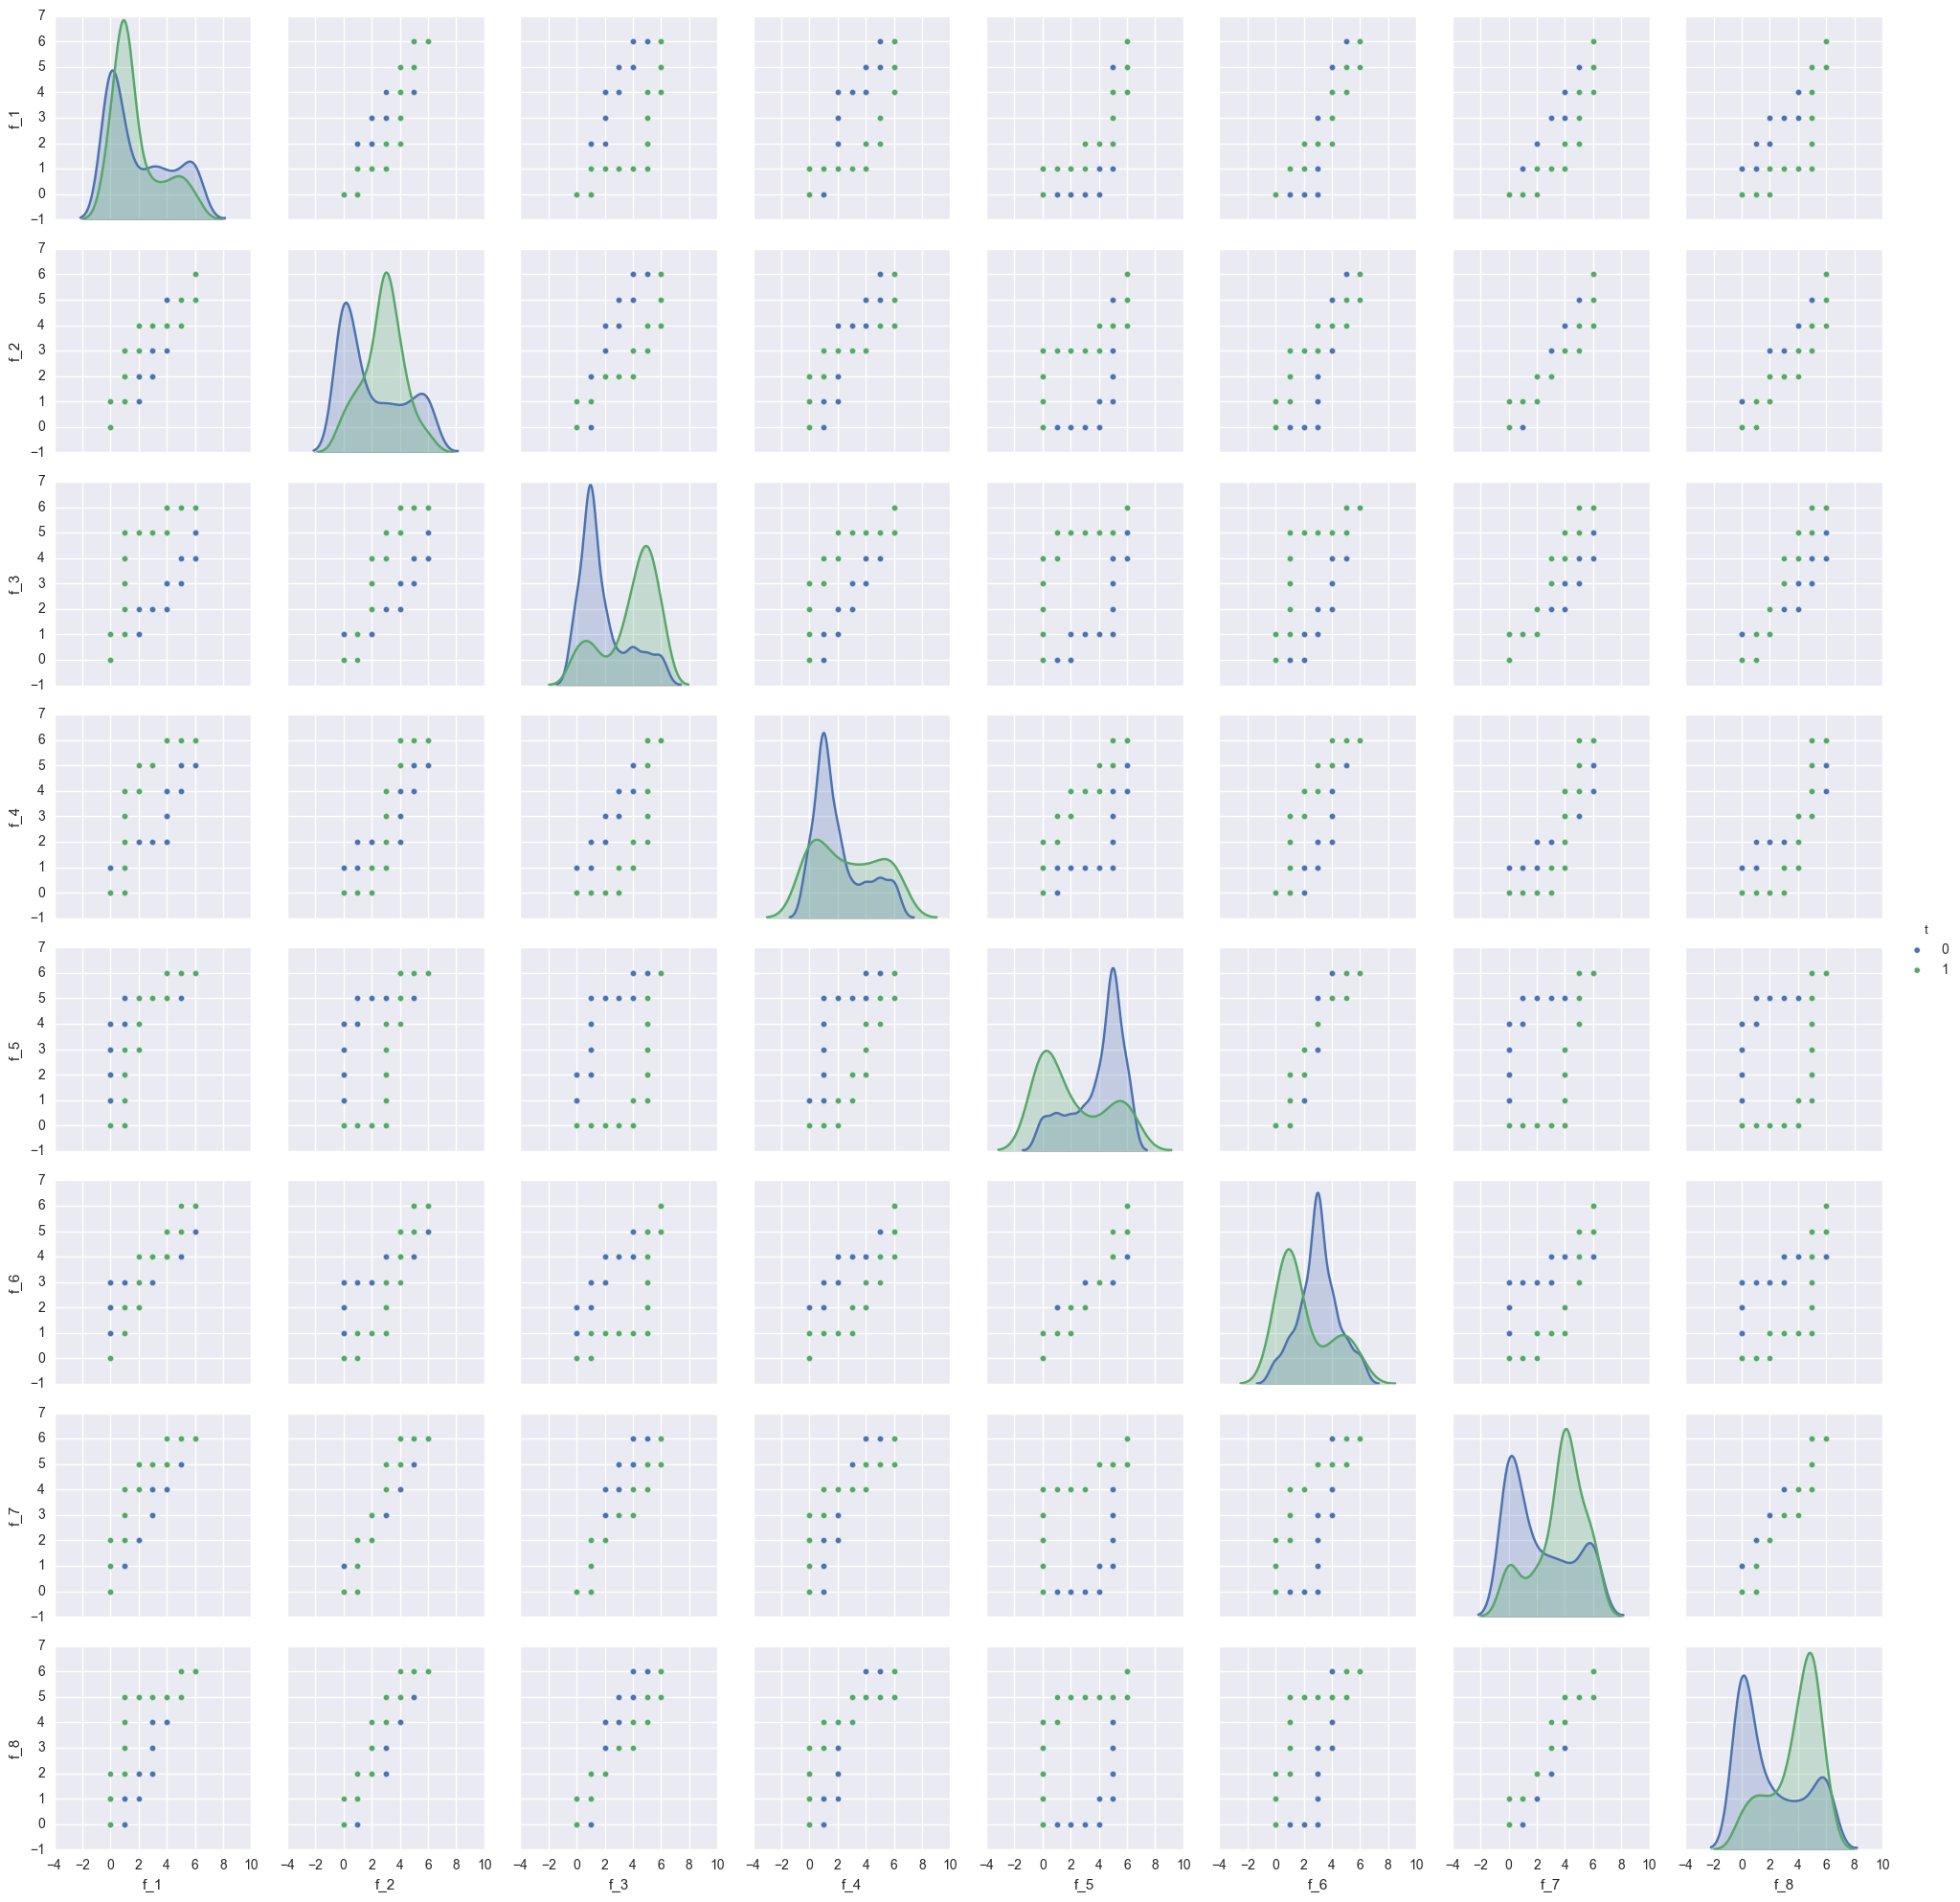

In [74]:
sns.pairplot(data=sample_data, hue='t',
             vars=sample_data.columns[:-1],
             diag_kind='kde', diag_kws=dict(shade=True))

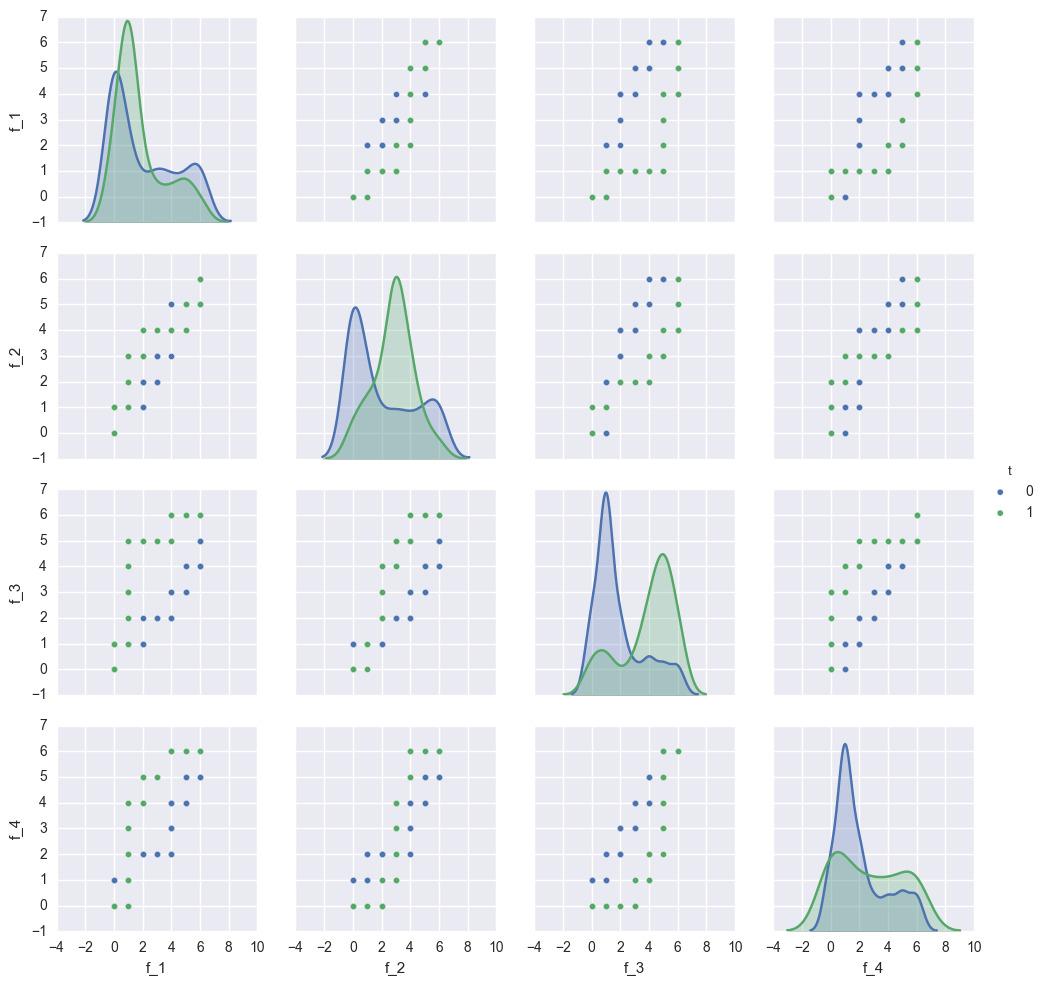

In [10]:
plot_data=sample_data[['f_1', 'f_2', 'f_3', 'f_4', 't']]
sns.pairplot(data=plot_data,
             hue='t', vars=plot_data.columns[:-1],
             diag_kind='kde', diag_kws=dict(shade=True)
            )

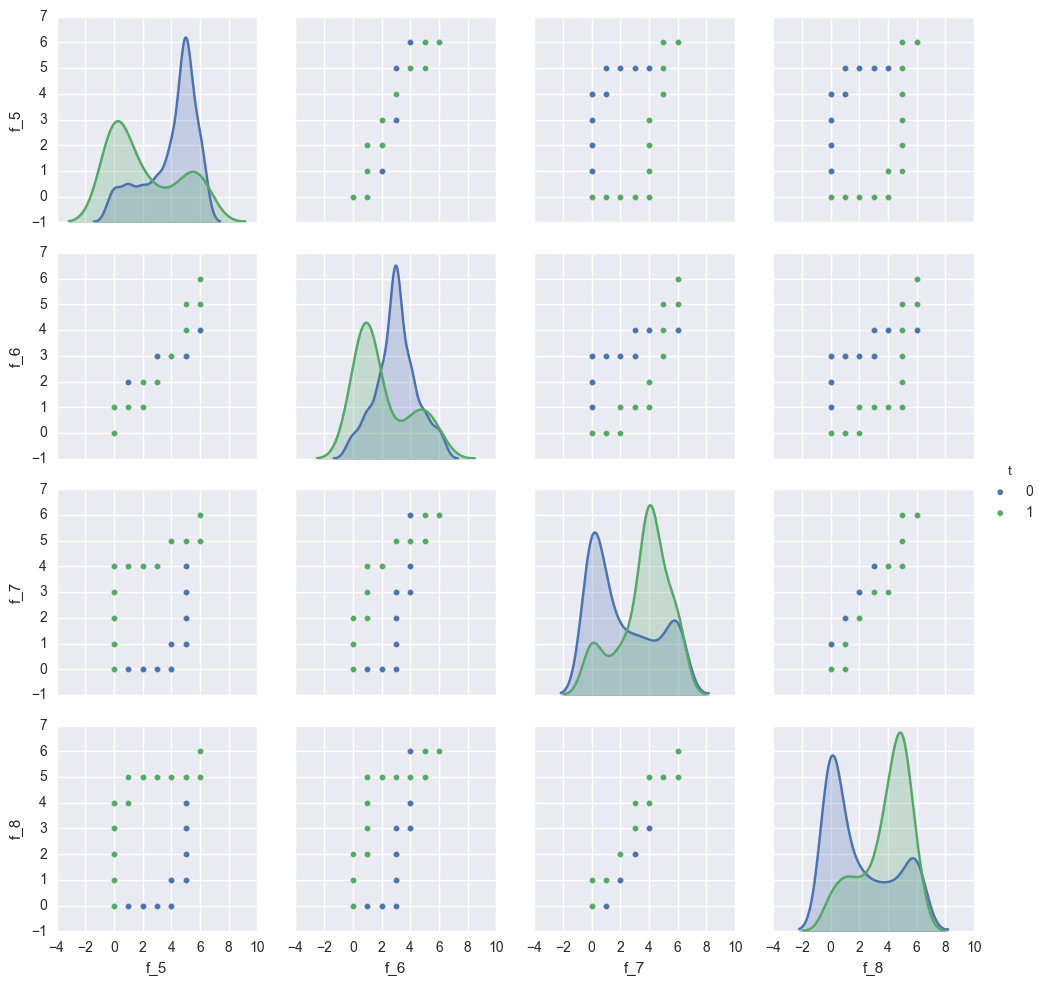

In [11]:
plot_data=sample_data[['f_5', 'f_6', 'f_7', 'f_8', 't']]
sns.pairplot(data=plot_data,
             hue='t', vars=plot_data.columns[:-1],
             diag_kind='kde', diag_kws=dict(shade=True))

In [10]:
train_X, test_X, train_t, test_t = train_test_split(
    sample_data.iloc[:,:-1].as_matrix(),
    sample_data.iloc[:,-1:].as_matrix(),
    train_size = 0.8
)

In [11]:
model = Sequential()
model.add(Dense(1, input_shape=(n_features,)))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'fmeasure'])

In [12]:
model.fit(train_X, train_t, nb_epoch=1000, batch_size=5, verbose=0)

In [13]:
scores = model.evaluate(test_X, test_t)
print(scores)

 32/100 [========>.....................] - ETA: 0s[0.066751071345061058, 0.96999999999999997, 0.76799992561340336]


In [14]:
weights = model.layers[0].get_weights()
coefs = np.abs(
            np.concatenate(
                (weights[0][:], np.reshape(weights[1][:],(1,1))),
                axis=0)
        )
results = pd.DataFrame(
            np.concatenate((coefs,
                            np.asmatrix(sample_data.columns).T), axis=1),
                            columns=['weights', 'features'])

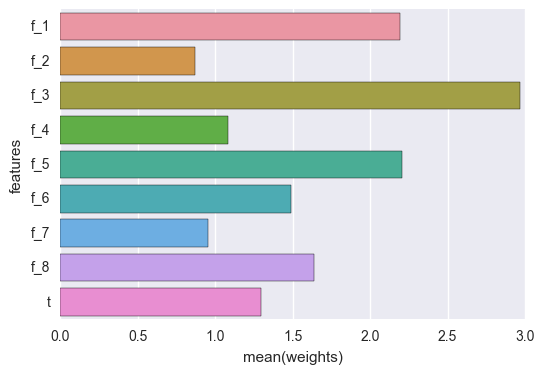

In [15]:
sns.barplot(x='weights', y='features', data=results[:])

In [20]:
from sklearn import decomposition

In [21]:
sample_data.iloc[:,:-1].head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8
0,2,4,5,5,5,4,5,5
1,3,4,5,5,5,4,5,5
2,0,0,1,1,4,3,0,0
3,0,0,1,1,2,2,0,0
4,0,1,1,0,0,0,0,1


In [22]:
pca = decomposition.PCA(n_components=3)
pca.fit(sample_data.iloc[:,:-1])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
pca_data = pca.transform(sample_data.iloc[:,:-1])

In [24]:
pca_df = pd.DataFrame(np.concatenate((pca_data,
                                      np.reshape(sample_data['t'].as_matrix(), (n_samples, 1))), axis=1),
                         columns=['p_1', 'p_2', 'p_3', 't'])

In [60]:
pca_train_X, pca_test_X, pca_train_t, pca_test_t = train_test_split(
    pca_df.iloc[:,:-1].as_matrix(),
    pca_df.iloc[:,-1:].as_matrix(),
    train_size = 0.8
)

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go

In [56]:
trace1 = go.Scatter3d(
    x = pca_df[pca_df.t==0]['p_1'].values,
    y = pca_df[pca_df.t==0]['p_2'].values,
    z = pca_df[pca_df.t==0]['p_3'].values,
    mode = 'markers',
    marker = dict(
        size=5,
        line=dict(
            color='rgba(0, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
trace2 = go.Scatter3d(
    x = pca_df[pca_df.t==1]['p_1'].values,
    y = pca_df[pca_df.t==1]['p_2'].values,
    z = pca_df[pca_df.t==1]['p_3'].values,
    mode = 'markers',
    marker = dict(
        size=5,
        symbol = 'circle',
        line=dict(
            color='rgba(217, 0, 0, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)
g_data = [trace1, trace2]
layout = go.Layout(
    margin = dict(
        l=0, r=0, b=0, t=0
    )
)
fig = go.Figure(data=g_data, layout=layout)
py.iplot(fig)

![post PCA plot](newplot.png "post PCA plot")

In [18]:
model_pca = Sequential()
model_pca.add(Dense(1, input_shape=(3,)))
model_pca.add(Activation('sigmoid'))
model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'fmeasure'])

In [61]:
model_pca.fit(pca_train_X, pca_train_t, nb_epoch=1000, batch_size=5, verbose=0)
scores = model_pca.evaluate(pca_test_X, pca_test_t)
print(scores)

 32/100 [========>.....................] - ETA: 0s[0.042032463848590849, 0.98999999999999999, 0.94117647171020513]


In [66]:
weights_pca = model_pca.layers[0].get_weights()
coefs = np.abs(
            np.concatenate(
                (weights_pca[0][:], np.reshape(weights[1][:],(1,1))),
                axis=0)
        )
results = pd.DataFrame(
            np.concatenate((coefs,
                            np.asmatrix(pca_df.columns).T), axis=1),
                            columns=['weights', 'features'])

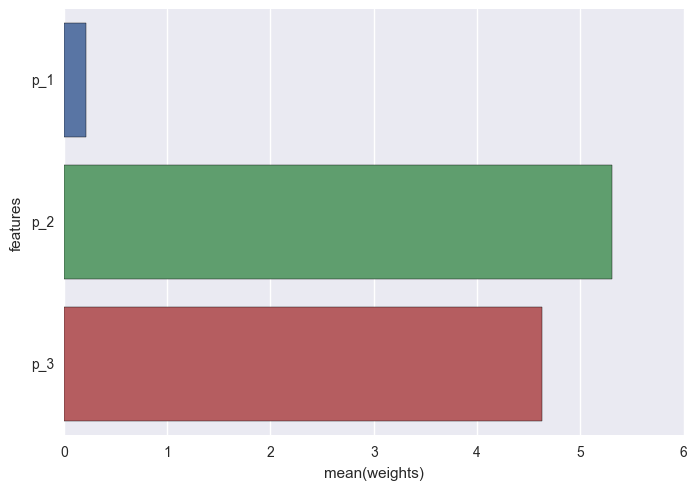

In [67]:
sns.barplot(x='weights', y='features', data=results[:-1])

In [25]:
from sklearn.model_selection import cross_val_score

In [30]:
pca_df.iloc[:,:-1].as_matrix()

array([[ 5.27828558,  0.82305245,  2.16720019],
       [ 5.66955516,  0.7352283 ,  1.66222213],
       [-4.36268783, -1.92615006,  1.03992145],
       ..., 
       [-5.15285069,  0.02240261,  0.73362704],
       [-5.15285069,  0.02240261,  0.73362704],
       [-5.47623818, -0.25996065,  0.08808179]])

In [32]:
scores = cross_val_score(model_pca,
                         pca_df.iloc[:,:-1].as_matrix(),
                         pca_df.iloc[:,-1:].as_matrix(), cv=5)

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.models.Sequential object at 0x113ce6550> does not.